# Introduction / Name of Capstone Project 

projet titanic : predire si une personne a survecu ou pas

# Library Imports 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Exploratory Analysis

In [24]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#dataframe dimensions
df_train.shape

(891, 12)

In [28]:
#colums datatypes
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

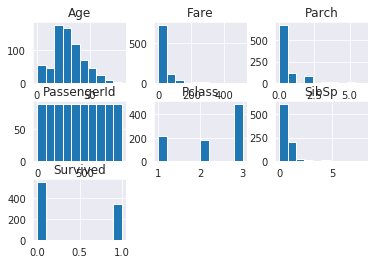

In [29]:
#histogrammes
df_train.hist()

#plot histogrammes
plt.show()

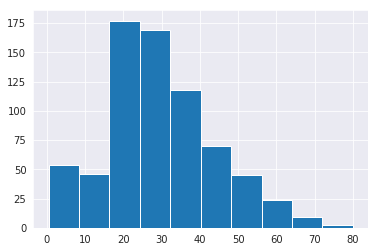

In [30]:
df_train.Age.hist()

In [31]:
df_train.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davison, Mrs. Thomas Henry (Mary E Finck)",male,1601,G6,S
freq,1,577,7,4,644


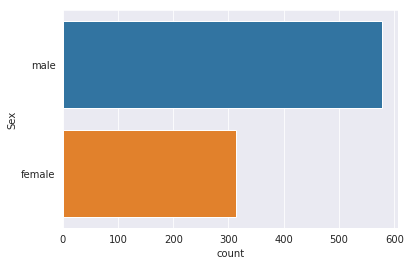

In [32]:
#plot gender
sns.countplot(y = 'Sex', data = df_train)
plt.show()

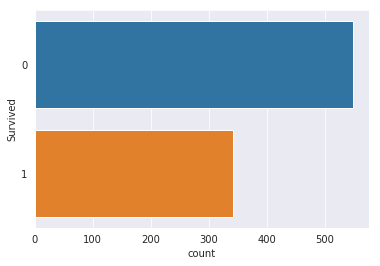

In [33]:
#plot survival
sns.countplot(y = 'Survived', data = df_train)
plt.show()

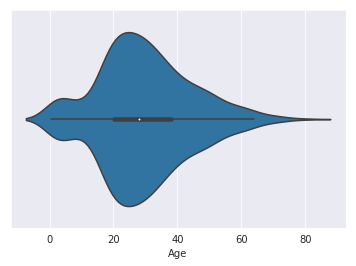

In [34]:
#plot age
sns.violinplot('Age', data = df_train)


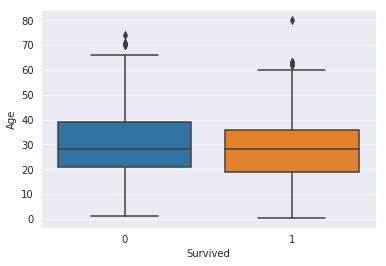

In [35]:
#plot age avec survived
sns.boxplot(y= 'Age', x ='Survived', data = df_train)

In [36]:
correlations = df_train.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


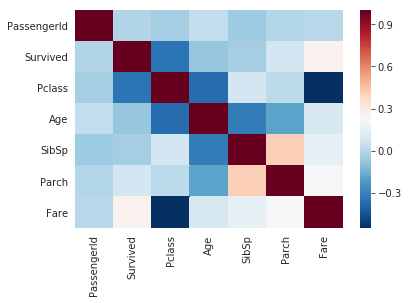

In [37]:
sns.heatmap(correlations, cmap = 'RdBu_r')

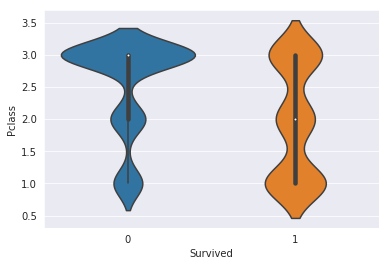

In [38]:
#violinplot entre les survivants et la classe
sns.violinplot(y='Pclass', x='Survived', data=df_train)

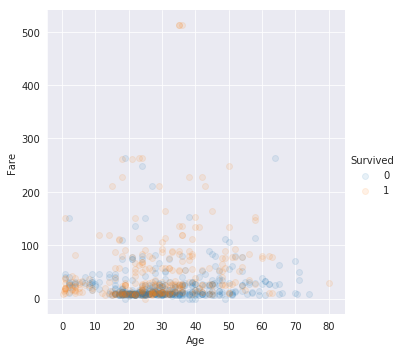

In [39]:
#scatter plot survival et age 
sns.lmplot(x='Age',
           y='Fare',
           hue='Survived',
           data=df_train,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

# Data Cleaning 

In [42]:
#drop duplicates
df_train = df_train.drop_duplicates()
print(df_train.shape)

(891, 12)


In [43]:
df_train.isnull().sum()
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# my_imputer = SimpleImputer(strategy='most_frequent')
# my_imputer.fit(df)
# my_imputer.transform(df)
# new_df = df.copy
# new_df = pd.dataframe(myimputer)

In [44]:
#replace mising values in cabin with most frequent values
my_imputer = SimpleImputer(strategy='most_frequent')
my_imputer.fit(df_train['Cabin'].values.reshape(-1, 1))
df_train['Cabin'] = my_imputer.transform(df_train['Cabin'].values.reshape(-1, 1))
df_test['Cabin'] = my_imputer.transform(df_test['Cabin'].values.reshape(-1, 1))




In [46]:
#replace mising values in age with most median age
second_imputer = SimpleImputer(strategy = 'median')
second_imputer.fit(df_train['Age'].values.reshape(-1,1))
df_train['Age'] = second_imputer.transform(df_train['Age'].values.reshape(-1,1))

In [47]:
#replace missing values in embarked with 
df_train.fillna('missing', inplace = True)

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


# Feature Engineering

In [51]:
#put ages by groups and fill the missing age by median age group
# df_corr = df_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
# df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
# df_corr[df_corr['Feature 1'] == 'Age']

# df_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
# df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
# df_corr[df_test['Feature 1'] == 'Age']


In [52]:
#group passengers by sex and Pclass and calculate the median age
age_by_pclass_sex = df_train.groupby(['Sex','Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print(f'Median age of Pclass {pclass} {sex}s:{age_by_pclass_sex[sex][pclass]}')
print(f'Median age of all passengers: {df_train.Age.median()}')

Median age of Pclass 1 females:32.5
Median age of Pclass 1 males:36.0
Median age of Pclass 2 females:28.0
Median age of Pclass 2 males:29.0
Median age of Pclass 3 females:28.0
Median age of Pclass 3 males:28.0
Median age of all passengers: 28.0


In [55]:
#Filling missing values in age with the medians value by sex and Pclass groups

df_train.Age = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
df_test.Age = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [56]:
#embarked class missing replace by 'S' because of a websearch about this person
df_train[df_train['Embarked']== 'missing'].replace('missing', 'S')
df_test[df_test['Embarked']== 'missing'].replace('missing', 'S')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [59]:
#count the number of survival
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_perc = survived/df_train.shape[0] * 100
not_survived_perc = not_survived/df_train.shape[0]*100
print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_perc))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_perc))


342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']


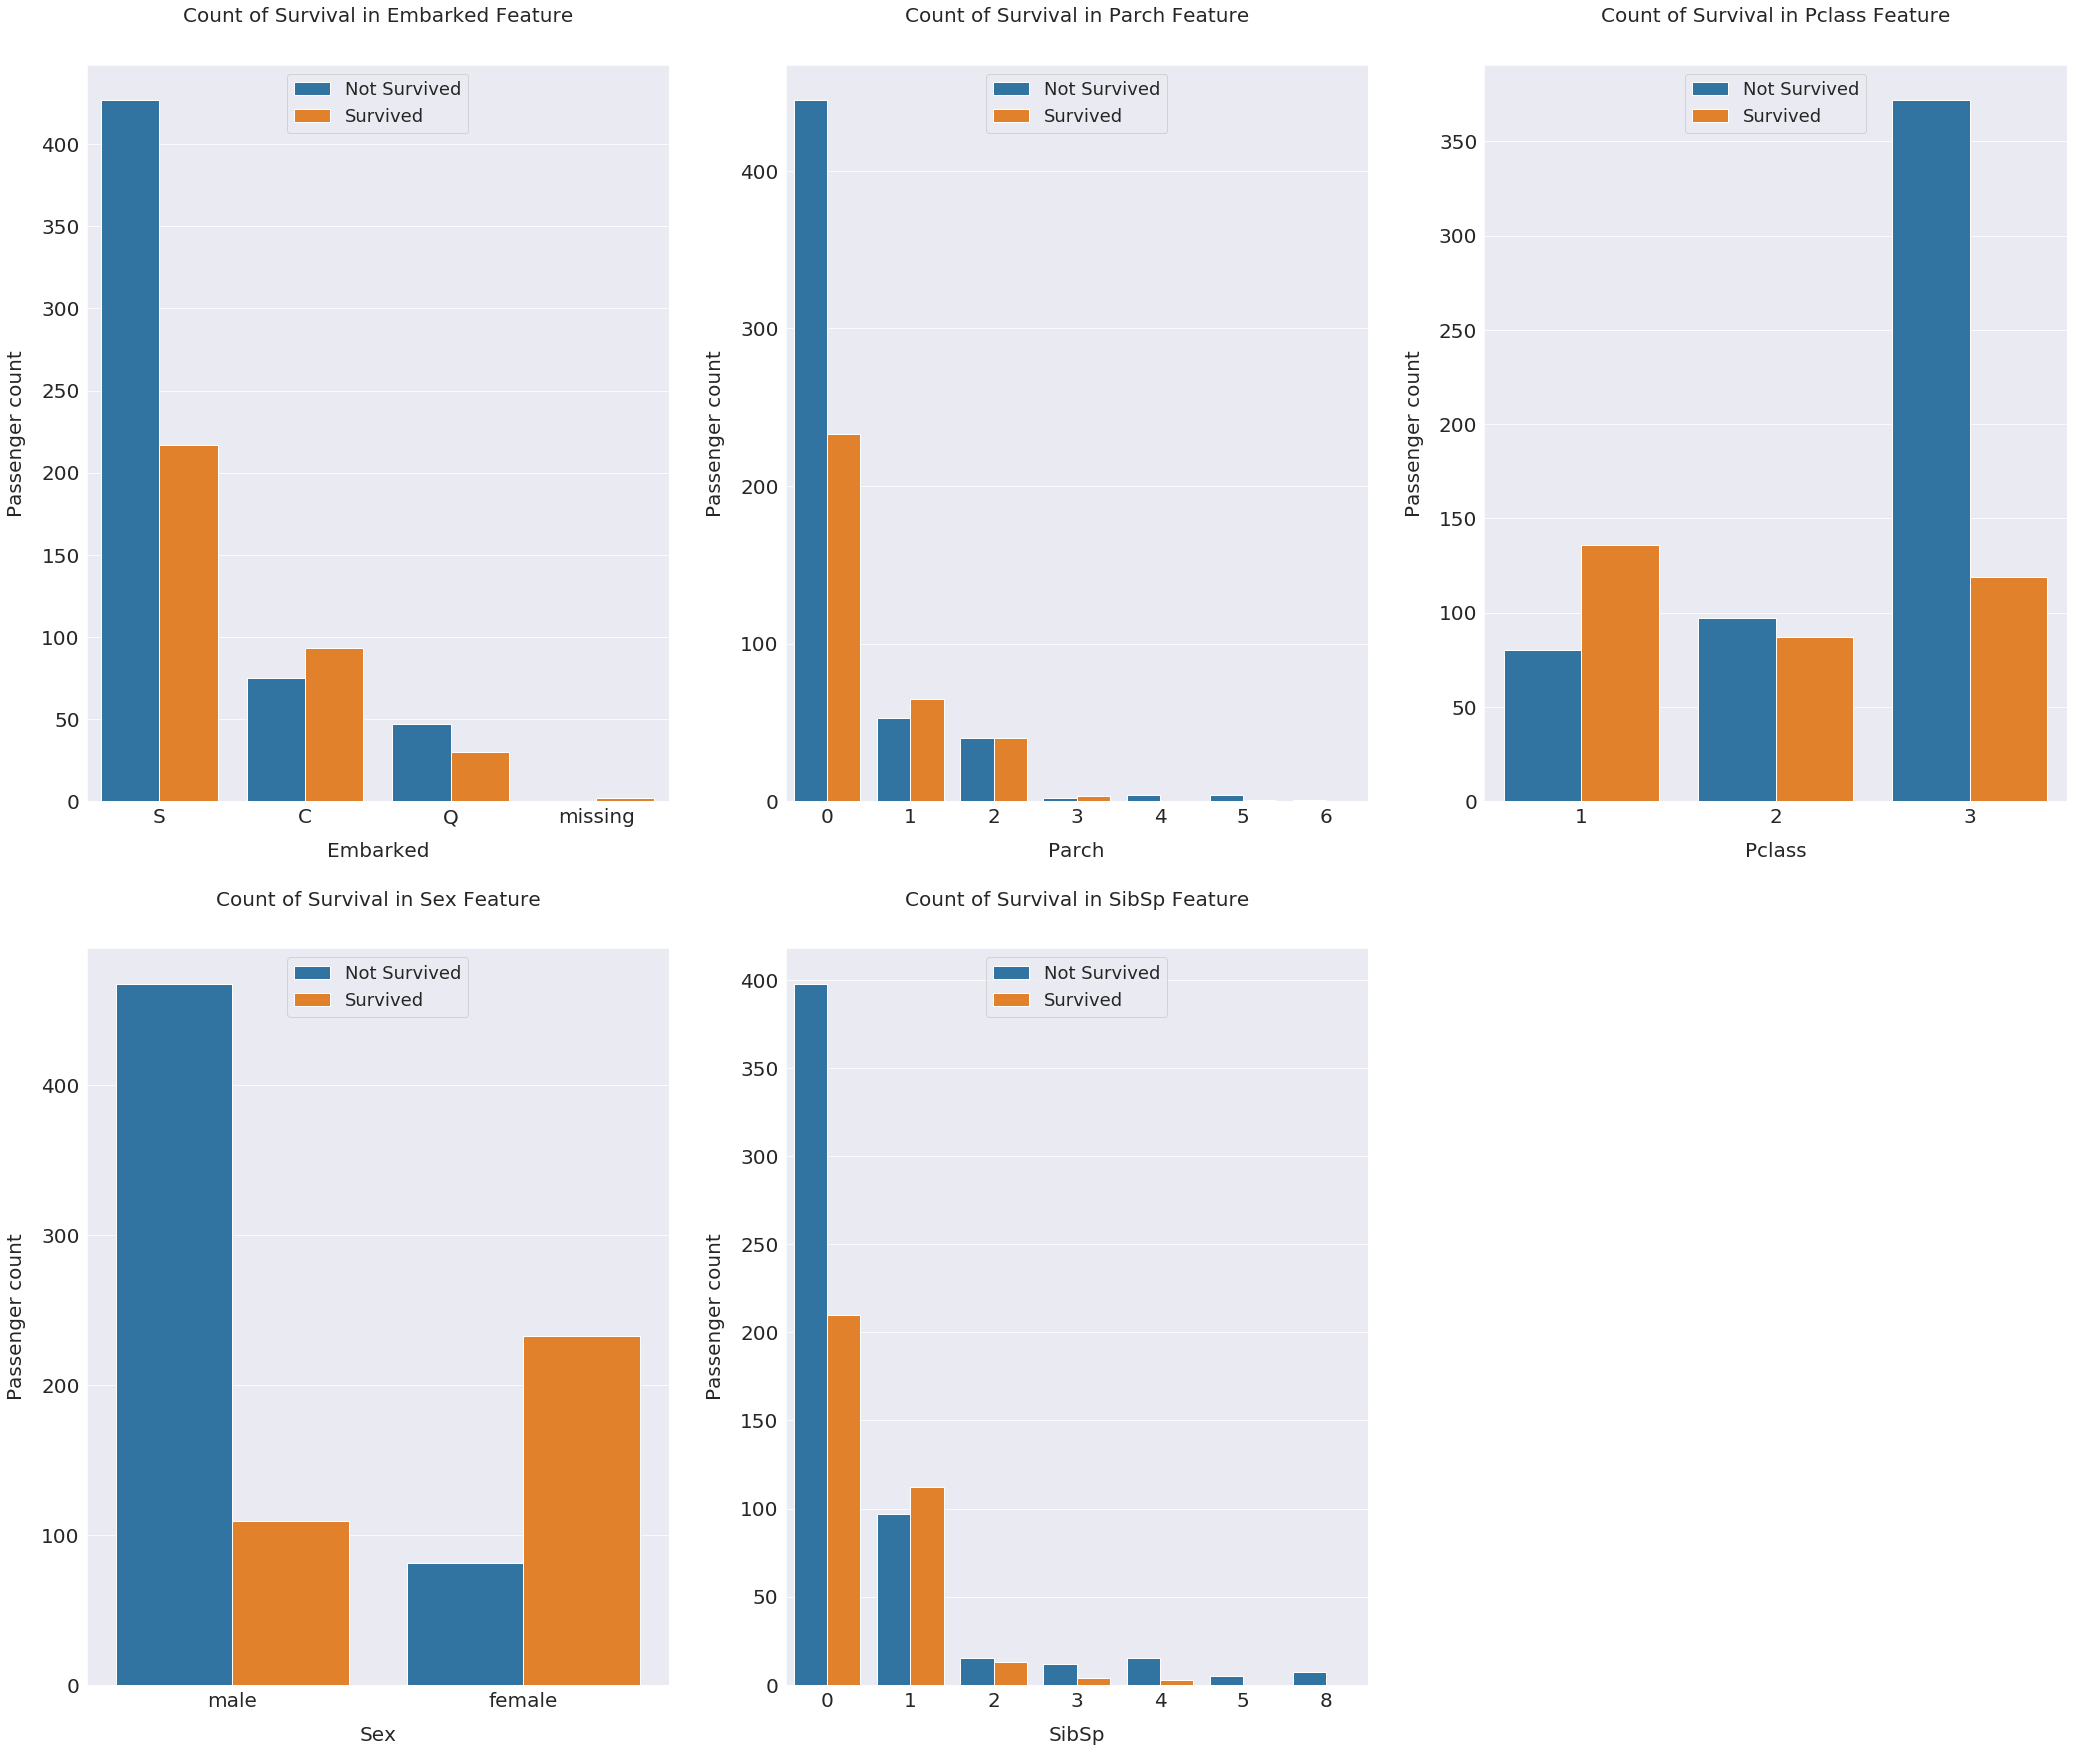

In [60]:
#manage categorical features
mask = (df_train.dtypes == 'object')
# print(mask)
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
print(cat_features)
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (20, 20))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_features,1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data =df_train)
    
    plt.xlabel(f'{feature}', size =20, labelpad =15)
    plt.ylabel('Passenger count', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis ='y', labelsize = 20)
    
    plt.legend(['Not Survived', 'Survived'], loc ='upper center', prop = {'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
    
plt.show()

In [61]:
df_all = pd.concat([df_train,df_test])
print(df_all.head())
df_all.shape

    Age    Cabin Embarked     Fare  \
0  22.0  B96 B98        S   7.2500   
1  38.0      C85        C  71.2833   
2  26.0  B96 B98        S   7.9250   
3  35.0     C123        S  53.1000   
4  35.0  B96 B98        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0     

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(1309, 12)

In [62]:
df_all.shape
df_test.shape

(418, 11)

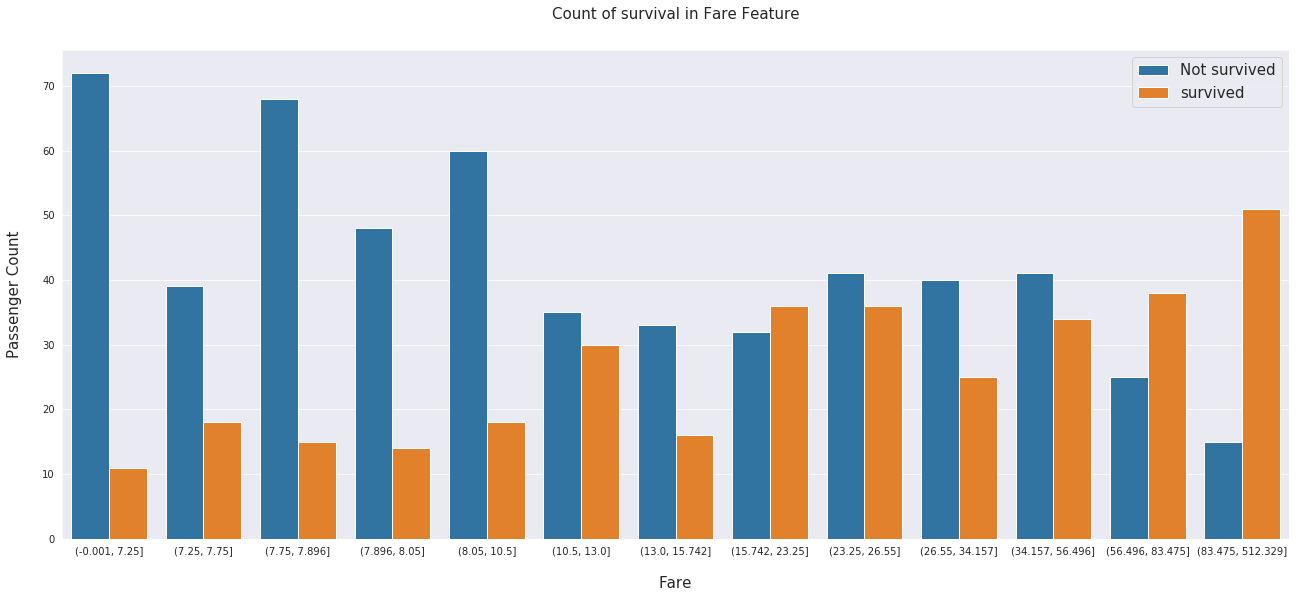

In [63]:
#relation between the Fare and the chance of survival

df_all['Fare'] = pd.qcut(df_all['Fare'],13)

fig, axs = plt.subplots(figsize = (22, 9))
sns.countplot(x = 'Fare', hue = 'Survived', data = df_all)
plt.xlabel('Fare', size = 15, labelpad = 20)
plt.ylabel('Passenger Count', size = 15, labelpad = 20)

plt.legend(['Not survived', 'survived'], loc = 'upper right',
prop = {'size':15})
plt.title('Count of survival in {} Feature'.format('Fare'),
size = 15, y =1.05)
plt.show()

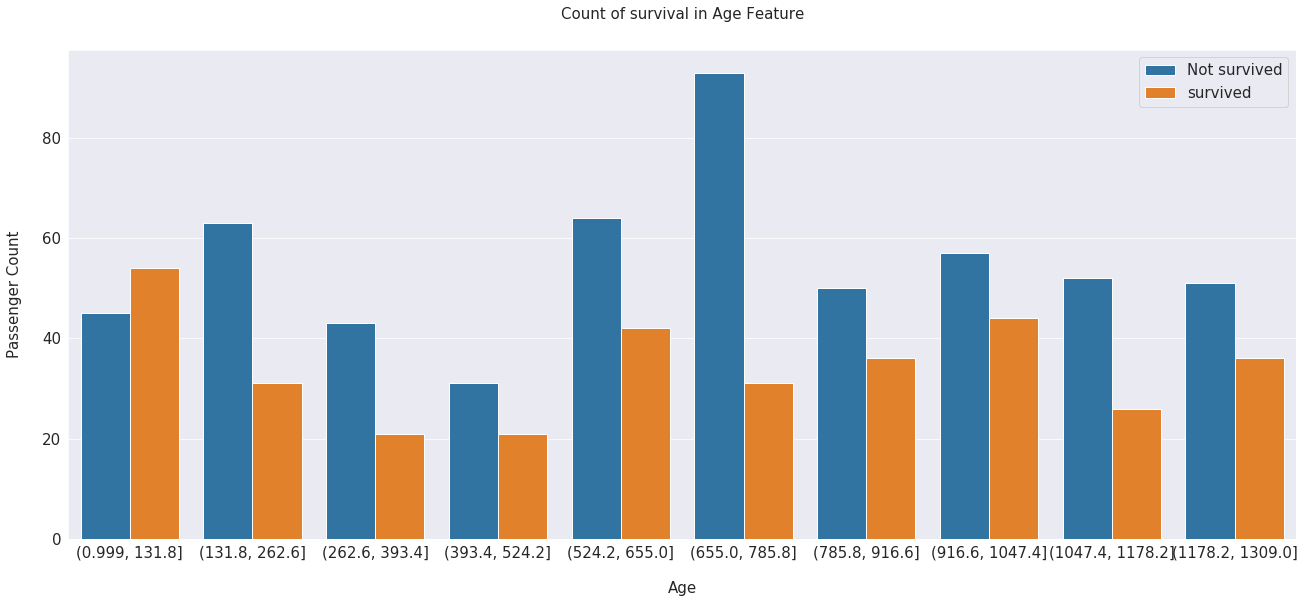

In [64]:
df_all['Age'] = pd.qcut(df_all['Age'].rank(method='first'),10)

fig, axs = plt.subplots(figsize = (22, 9))
sns.countplot(x = 'Age', hue = 'Survived', data = df_all)
plt.xlabel('Age', size = 15, labelpad = 20)
plt.ylabel('Passenger Count', size = 15, labelpad = 20)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not survived', 'survived'], loc = 'upper right',
prop = {'size':15})
plt.title('Count of survival in {} Feature'.format('Age'),
size = 15, y =1.05)
plt.show()

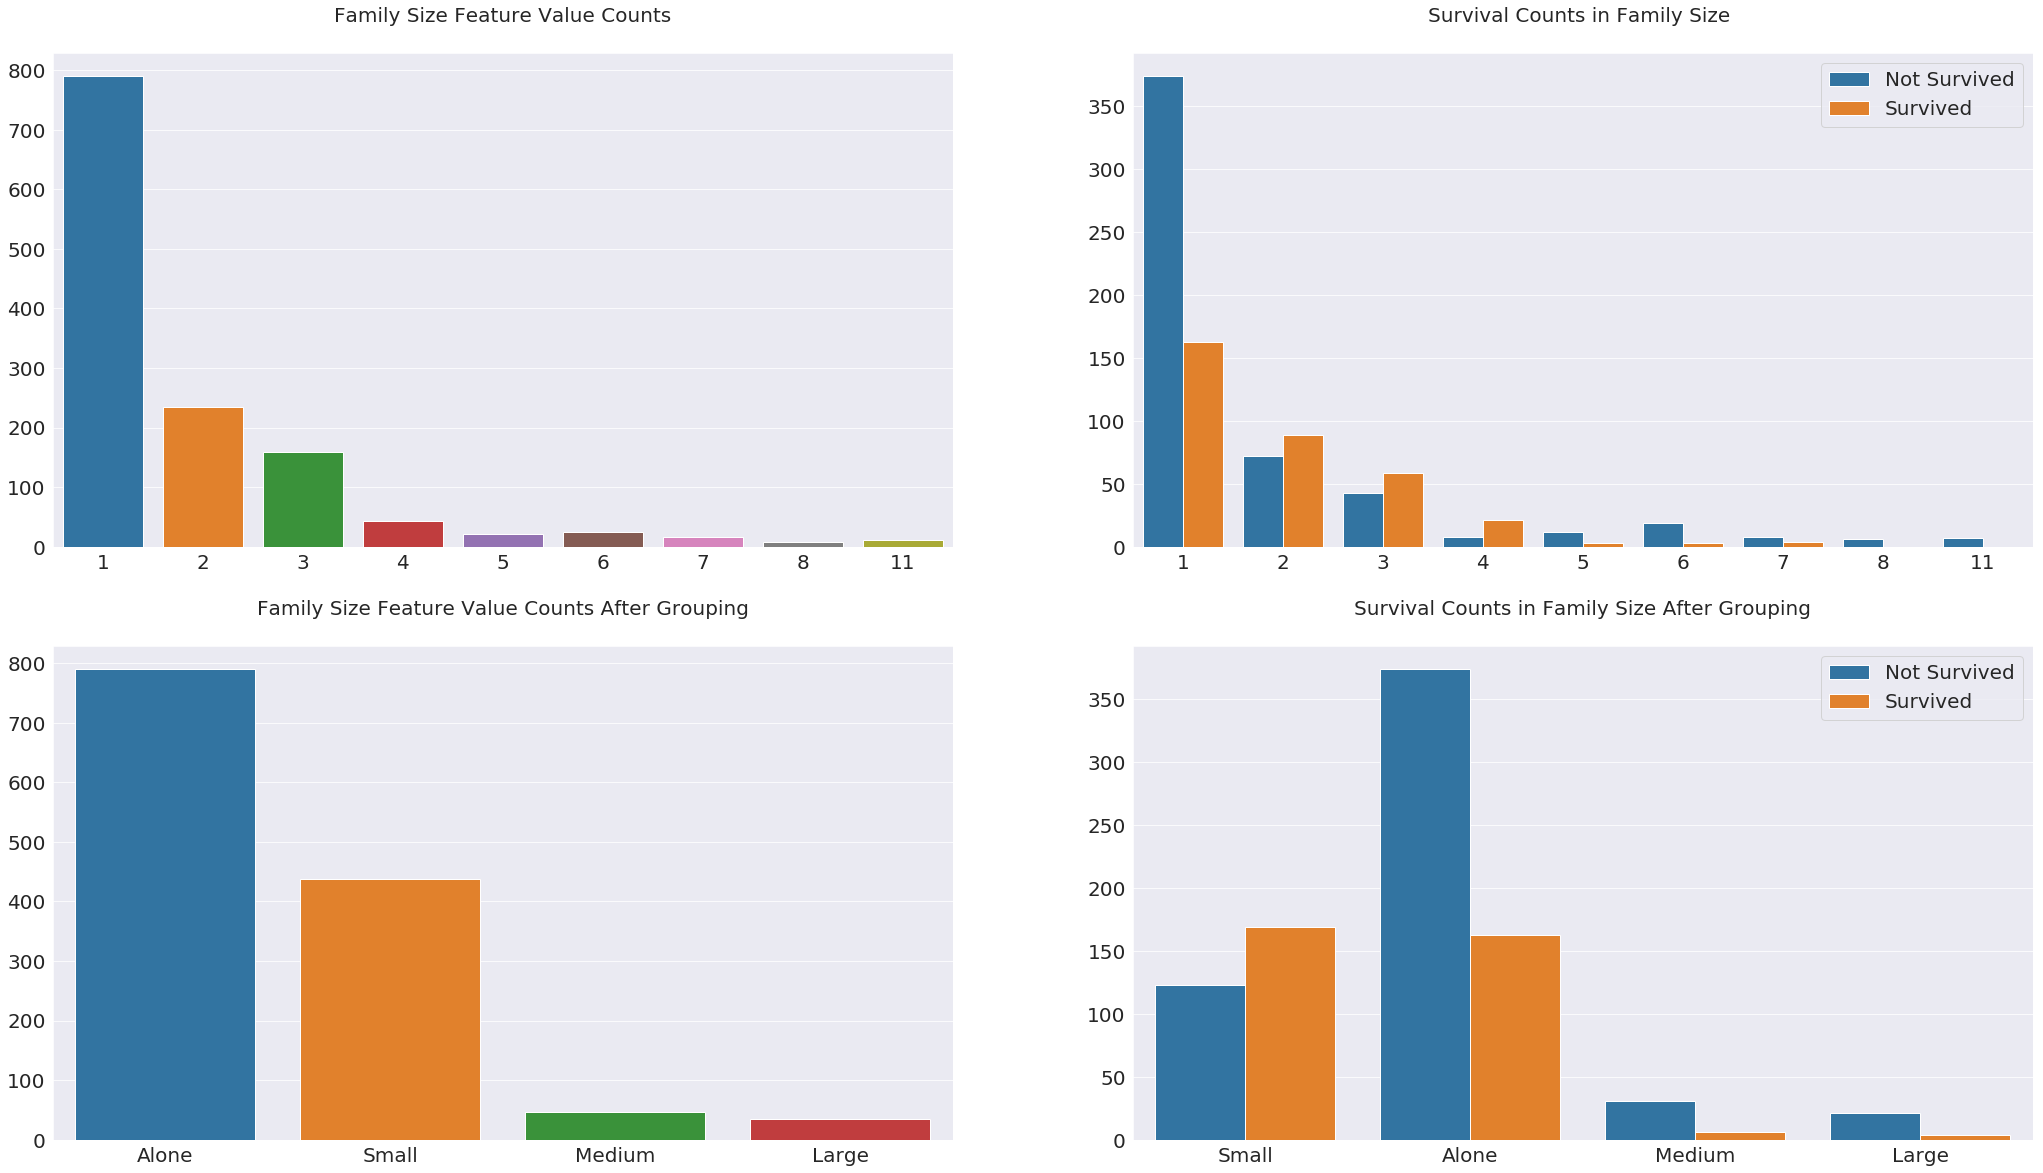

In [65]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch']+1
fig, axs = plt.subplots(figsize = (20,20), ncols = 2, nrows =2)
plt.subplots_adjust(right = 1.5)

sns.barplot(x = df_all['Family_Size'].value_counts().index,
           y = df_all['Family_Size'].value_counts().values,
           ax = axs[0][0])
sns.countplot(x ='Family_Size', hue = 'Survived', data = df_all, ax= axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1:'Alone', 2: 'Small', 3: 'Small',4: 'Small', 5:'Medium',6:'Medium',7:'Large',8:'Large',9:'Large', 10:'Large', 11:'Large' }
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index,
            y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])


axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

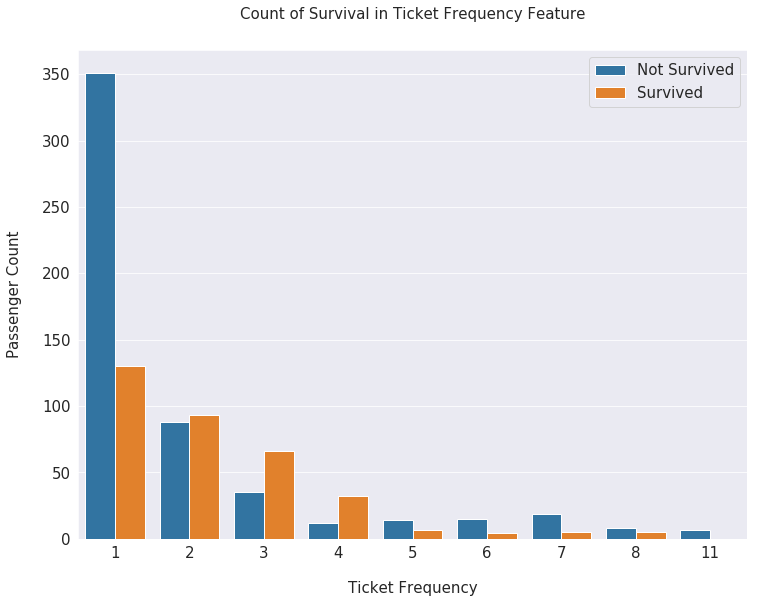

In [66]:
#survival function of nbre of tickets buy

df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

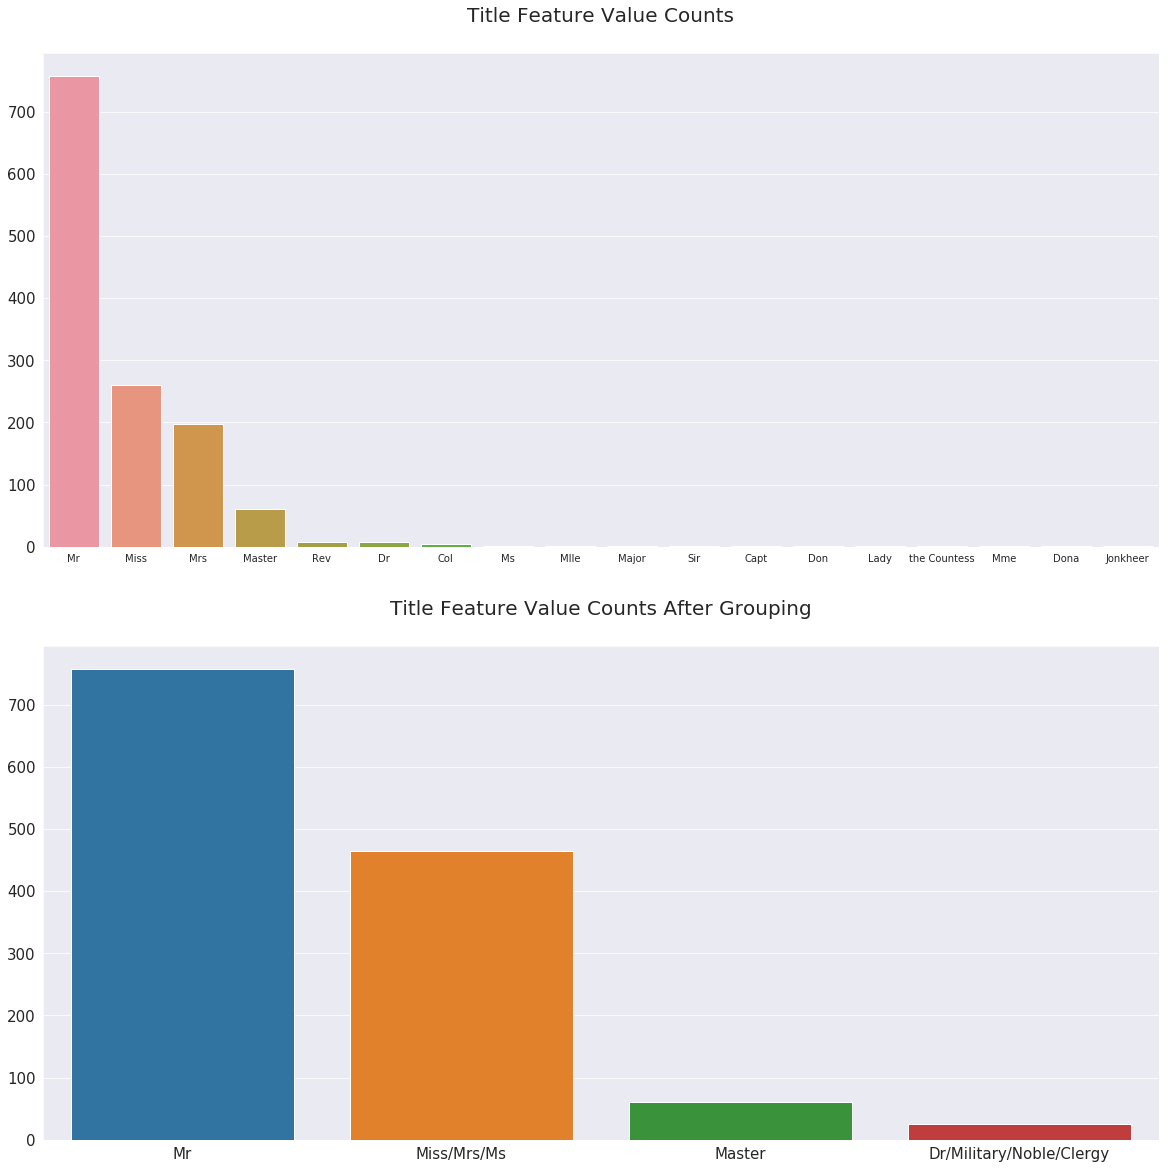

In [68]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1
df_all.head()



fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x =df_all['Title'].value_counts().index,
            y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [70]:
df_all.shape

(1309, 17)

In [79]:
 #extract_surname of the passenger
import string
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])

df_train = df_all.iloc[:890, :]
df_test = df_all.iloc[891:, : ]


dfs = [df_train, df_test]

In [73]:
#df_train.head()

print(df_train.shape)
print(df_test.shape)

(890, 18)
(418, 18)


In [75]:
df_train.head()
 # Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]


In [76]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [93]:
df_train.head()
df_train.shape


(890, 18)

In [95]:
df_test.shape

(418, 18)

In [ ]:
#apply one hot encoded to each column with categorical data
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
# OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# # One-hot encoding removed index; put it back
# OH_cols_train.index = X_train.index
# OH_cols_valid.index = X_valid.index
# # print(OH_cols_train.head())

# # Remove categorical columns (will replace with one-hot encoding)
# num_X_train = X_train.drop(object_cols, axis =1)
# num_X_valid = X_valid.drop(object_cols, axis = 1)
# # print(num_X_train.head())
# #  Add one-hot encoded columns to numerical features
# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis = 1)# Your code here
# OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis = 1) # Your code here
# print(OH_X_train)

# # Check your answer
# step_4.check()

In [115]:
# X.dropna(axis=0, subset=['SalePrice'], inplace=True)
# y = X.SalePrice
# X.drop(['SalePrice'], axis=1, inplace=True)

df_test.dropna(axis = 0, substest['Survived'], inplace = True)
y_test = df_test.Survived

df_train.dropna(axis = , substest['Survived'], inplace = True)
y_train = df_train.Survived

SyntaxError: positional argument follows keyword argument (<ipython-input-115-43e422d33a5f>, line 5)

In [114]:
df_train.head()
# df_train = df_train.drop(['Cabin', 'Ticket'], axis= 1)
# df_test = df_test.drop(['Cabin', 'Ticket'], axis = 1)
# df_train.head()
# df_test.head()
# cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
# X.drop(cols_with_missing, axis=1, inplace=True)
# X_test.drop(cols_with_missing, axis=1, inplace=True)

df_test = 
categorial = ['Fare','Family']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[categorial]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[categorial]))


ValueError: Input contains NaN

# Model Training

# Insights & Analysis

In [ ]:
()